In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

# Generating random uniform numbers 
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)

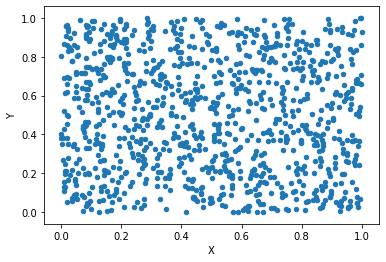

In [16]:
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy
df_xy.plot(x="X",y = "Y",kind="scatter")

In [3]:
model1 = KMeans(n_clusters=5).fit(df_xy)
model1.labels_
model1.cluster_centers_

array([[0.85423883, 0.23134493],
       [0.75557061, 0.75632359],
       [0.15600751, 0.26891622],
       [0.23147495, 0.76824798],
       [0.51936119, 0.26421395]])

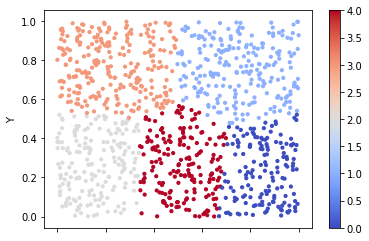

In [4]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [5]:
Univ = pd.read_csv("C:/Users/Pranit/Desktop/pythonscripts/datasets/Universities.csv")

In [6]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [7]:
#normalization function

def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return (x)

In [8]:
#normalized dataframe

df_norm = norm_func(Univ.iloc[:,1:])

In [9]:
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [10]:
###### screw plot or elbow curve ############
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x41bab1f08>,
 <a list of 13 Text xticklabel objects>)

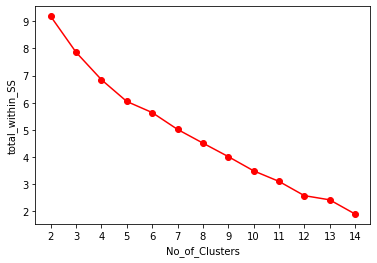

In [11]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)


In [12]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
Univ['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


In [14]:
Univ = Univ.iloc[:,[7,0,1,2,3,4,5,6]]

Univ.iloc[:,1:7].groupby(Univ.clust).mean()

Univ.to_csv("Univsersity.csv")

In [17]:
#iris dataset

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale #scale variables

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 7, 4 #plotting parameters

In [31]:
iris = datasets.load_iris()

X = scale(iris.data)

y = pd.DataFrame(iris.target)
variables_names = iris.feature_names

X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

# building and running model

In [32]:
clustering = KMeans(n_clusters = 3, random_state = 5)
clustering.fit(X) #summary of model with default parameters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

# plotting model outputs

In [38]:
iris_df = pd.DataFrame(iris.data)

iris_df.columns = ['Sepal_Length', 'Sepal_width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']

Text(0.5, 1.0, 'K Means Classification')

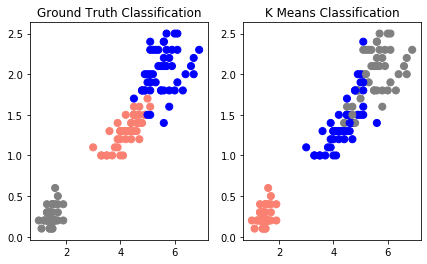

In [44]:
color_theme = np.array(['grey', 'salmon', 'blue'])

plt.subplot(1,2,1)

plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[iris.target], s = 50)

plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[clustering.labels_], s = 50)

plt.title('K Means Classification')

Text(0.5, 1.0, 'K Means Classification')

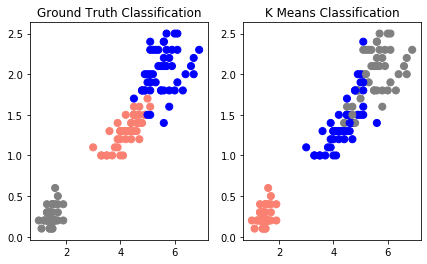

In [43]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)

plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[iris.target], s = 50)

plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[clustering.labels_], s = 50)

plt.title('K Means Classification')

# evaluate clustering results

In [46]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

